# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

Python-dotenv could not parse statement starting at line 1


True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [4]:
# The monthly amount for the member's household income
monthly_income = 12000

#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [6]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response, indent=2, sort_keys=True))


{
  "data": {
    "1": {
      "circulating_supply": 18766812,
      "id": 1,
      "last_updated": 1627268079,
      "max_supply": 21000000,
      "name": "Bitcoin",
      "quotes": {
        "USD": {
          "market_cap": 723402023655,
          "percent_change_1h": -0.0101116769975877,
          "percent_change_24h": 12.5017210248258,
          "percent_change_7d": 20.6492537948055,
          "percentage_change_1h": -0.0101116769975877,
          "percentage_change_24h": 12.5017210248258,
          "percentage_change_7d": 20.6492537948055,
          "price": 38511.0,
          "volume_24h": 33692816559
        }
      },
      "rank": 1,
      "symbol": "BTC",
      "total_supply": 18766812,
      "website_slug": "bitcoin"
    }
  },
  "metadata": {
    "error": null,
    "num_cryptocurrencies": 3105,
    "timestamp": 1627268079
  }
}


In [7]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, indent=2, sort_keys=True))


{
  "data": {
    "1027": {
      "circulating_supply": 116843453,
      "id": 1027,
      "last_updated": 1627268079,
      "max_supply": 0,
      "name": "Ethereum",
      "quotes": {
        "USD": {
          "market_cap": 271575815263,
          "percent_change_1h": 0.496075688148742,
          "percent_change_24h": 7.5445731776203,
          "percent_change_7d": 21.870560773527,
          "percentage_change_1h": 0.496075688148742,
          "percentage_change_24h": 7.5445731776203,
          "percentage_change_7d": 21.870560773527,
          "price": 2322.52,
          "volume_24h": 22635102294
        }
      },
      "rank": 2,
      "symbol": "ETH",
      "total_supply": 116843453,
      "website_slug": "ethereum"
    }
  },
  "metadata": {
    "error": null,
    "num_cryptocurrencies": 3105,
    "timestamp": 1627268079
  }
}


#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [8]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Print the current price of BTC
print(f"the current price of Bitcoin is ${btc_price:,.2f}")


the current price of Bitcoin is $38,511.00


In [9]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Print the current price of ETH
print(f"the current price of Ethereum is ${eth_price:,.2f}")


the current price of Ethereum is $2,322.52


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [10]:
# Compute the current value of the BTC holding 
btc_value = btc_coins * btc_price

# Print current value of your holding in BTC
print(f"current value of the member's holding in BTC is ${btc_value:,.2f}")


current value of the member's holding in BTC is $46,213.20


In [11]:
# Compute the current value of the ETH holding 
eth_value = eth_coins * eth_price

# Print current value of your holding in ETH
print(f"current value of the member's holding in ETH is ${eth_value:,.2f}")


current value of the member's holding in ETH is $12,309.36


In [12]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
print(f"total value of the member's cryptocurrency wallet is ${total_crypto_wallet:,.2f}")


total value of the member's cryptocurrency wallet is $58,522.56


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [13]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

In [14]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

# verify type to confirm import
display(type(alpaca_api_key))
display(type(alpaca_secret_key))

str

str

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [15]:
# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2'
)

#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [16]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ['SPY','AGG']

# Set timeframe to 1D 
timeframe = '1D'

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
prior_weekday = '2021-07-23'
start_date = pd.Timestamp(prior_weekday, tz='America/New_York').isoformat()
end_date = pd.Timestamp(prior_weekday, tz='America/New_York').isoformat()

# typically, would also establish the number of rows to the max of 1,000,
# but only one day is needed for this api call

#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

In [17]:
# Use the Alpaca get_barset function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
prices_df = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
).df


In [18]:
# Review the first 5 rows of the Alpaca DataFrame
# ... no idea why they're asking for the first 5 rows when there's only a single datapoint...
prices_df.head()

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2021-07-23 00:00:00-04:00  116.03  116.22  116.03  116.21  4137100  437.53   

                                                           
                            high     low  close    volume  
time                                                       
2021-07-23 00:00:00-04:00  440.3  436.79  439.9  53294703

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [19]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = float(prices_df['AGG']['close'])

# Print the AGG closing price
print(f"the most recent close price for AGG was ${agg_close_price:,.2f}")


the most recent close price for AGG was $116.21


In [20]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = float(prices_df['SPY']['close'])

# Print the SPY closing price
print(f"the most recent close price for AGG was ${spy_close_price:,.2f}")


the most recent close price for AGG was $439.90


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [21]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_shares * agg_close_price

# Print the current value of the bond portfolio
print(f"the current value of the member's bond portion is ${agg_value:,.2f}")


the current value of the member's bond portion is $23,242.00


In [24]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_shares * spy_close_price

# Print the current value of the stock portfolio
print(f"the current value of the member's stock portion is ${spy_value:,.2f}")

the current value of the member's stock portion is $48,389.00


In [26]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = spy_value + agg_value

# Print the current balance of the stock and bond portion of the portfolio
print(f"the current value of the member's stock and bond portion is ${total_stocks_bonds:,.2f}")


the current value of the member's stock and bond portion is $71,631.00


In [28]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_crypto_wallet + total_stocks_bonds

# Print current savings portfolio total value
print(f"the current value of the member's savings portfolio is ${total_portfolio:,.2f}")


the current value of the member's savings portfolio is $130,153.56


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [29]:
# Consolidate financial assets data into a Python list
savings_data = [total_crypto_wallet, total_stocks_bonds]

# Review the Python list savings_data
savings_data

[58522.556, 71631.0]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [34]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(
    savings_data,
    columns = ['amount'],
    index = ['crypto','stock/bond']
)

# Display the savings_df DataFrame
savings_df


,amount
crypto,58522.556
stock/bond,71631.000


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'Portfolio Composition as of 2021-07-23'}, ylabel='amount'>

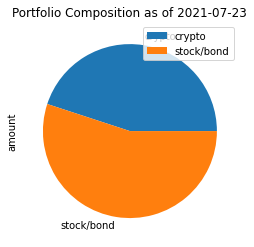

In [35]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot.pie(y='amount', title='Portfolio Composition as of 2021-07-23')


#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [37]:
# Create a variable named emergency_fund_value
emergency_fund_value = monthly_income * 3


##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [64]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio > emergency_fund_value:
    print(f"HOW 'BOUT THEM APPLES!?\nWith a portfolio value of ${total_portfolio:,.2f} "
            f"as of the most recent trading day {prior_weekday},\n"
            f"and based upon your monthly income of ${monthly_income:,.2f}, you are currently exceeding the\n"
            f"recommended 'Emergency Fund Value' of ${emergency_fund_value:,.2f} "
            f"by ${total_portfolio - emergency_fund_value:,.2f}!\n"
            f"KEEP UP THE GOOD WORK!!"
        )
elif total_portfolio == emergency_fund_value:
    print(f"NOW WE'RE TALKIN'!!\n"
        f"You've just hit the recommended 'Emergency Fund Value' of ${emergency_fund_value:,.2f}!\n"
        f"Now is the time to double down your efforts and continue your beneficial habit\n"
        f"of saving money in your portfolio for life's unexpected events.\n\n...\n\n\n"
        f"HUHHCHA!!!\n\n\n...\n\n\n...betcha didn't see that comin', did'ya?\n\nSee!?\n\nSuRpRiSeS!")
else:
    print(f"YOU'RE GETTING THERE!!\n"
        f"your portfolio value is currently behind the\n"
        f"${emergency_fund_value:,.2f} recommended 'Emergency Fund Value' by ${emergency_fund_value - total_portfolio:,.2f}\n"
        f"keep saving, and you'll get there if you keep up\n"
        f"the good saving habits you've been developing.\n"
        f"DON'T GIVE UP!! YOU CAN DO IT!"
    )


YOU'RE GETTING THERE!!
your portfolio value is currently behind the
$36,000.00 recommended 'Emergency Fund Value' by $1.00
keep saving, and you'll get there if you keep up
the good saving habits you've been developing.
DON'T GIVE UP!! YOU CAN DO IT!


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [65]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
start_date = pd.Timestamp('2018-07-23',tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-07-23',tz='America/New_York').isoformat()
# Set number of rows to 1000 to retrieve the maximum amount of rows
limit_rows = 1000

In [69]:
# Use the Alpaca get_barset function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
prices_df = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=limit_rows
).df


In [70]:
# Display both the first and last five rows of the DataFrame
display(prices_df.head())
display(prices_df.tail())

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2018-07-23 00:00:00-04:00  106.17  106.1850  105.8850  105.910  1603571.0   
2018-07-24 00:00:00-04:00  105.92  106.0700  105.9001  106.040  1924876.0   
2018-07-25 00:00:00-04:00  106.12  106.1700  105.9500  106.050  2028743.0   
2018-07-26 00:00:00-04:00  106.10  106.1500  105.9500  106.000  1721051.0   
2018-07-27 00:00:00-04:00  106.13  106.1599  106.0400  106.075  1261312.0   

                              SPY                                    
                             open    high     low   close    volume  
time                                                                 
2018-07-23 00:00:00-04:00  279.45  280.43  279.06  280.24  34039725  
2018-07-24 00:00:00-04:00  281.79  282.56  280.63  281.57  46684350  
2018-07-25 00:00:00-04:00  281.33  284.37  281.28  284.13  50868250  
2018-07-26 00:00:00-04:00  283.21  284.11  283.09  283.29  38319472  
2018-07-27 00:00:00-04:00  283.71  283.82  280.38  281.46  57211361

AGG                                       \
                              open      high     low   close     volume   
time                                                                      
2021-07-19 00:00:00-04:00  116.390  116.6085  116.35  116.52  6476334.0   
2021-07-20 00:00:00-04:00  116.780  116.8200  116.32  116.39  7229222.0   
2021-07-21 00:00:00-04:00  116.075  116.1500  115.92  116.02  7773071.0   
2021-07-22 00:00:00-04:00  116.030  116.3500  116.03  116.29  6269656.0   
2021-07-23 00:00:00-04:00  116.030  116.2200  116.03  116.21  4137100.0   

                              SPY                                         
                             open      high       low   close     volume  
time                                                                      
2021-07-19 00:00:00-04:00  426.19  431.4089  421.9700  424.97  127607115  
2021-07-20 00:00:00-04:00  425.68  432.4200  424.8300  431.04   87430308  
2021-07-21 00:00:00-04:00  432.34  434.7000  431.0111  434.56   54251351  
2021-07-22 00:00:00-04:00  434.74  435.7200  433.6900  435.50   41998182  
2021-07-23 00:00:00-04:00  437.53  440.3000  436.7900  439.90   53294703

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [72]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
MC_spy = MCSimulation(
    portfolio_data=prices_df,
    weights=[.40,.60],
    num_simulation=500,
    num_trading_days=252*30
)

# Review the simulation input data
MC_spy.portfolio_data.head()

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2018-07-23 00:00:00-04:00  106.17  106.1850  105.8850  105.910  1603571.0   
2018-07-24 00:00:00-04:00  105.92  106.0700  105.9001  106.040  1924876.0   
2018-07-25 00:00:00-04:00  106.12  106.1700  105.9500  106.050  2028743.0   
2018-07-26 00:00:00-04:00  106.10  106.1500  105.9500  106.000  1721051.0   
2018-07-27 00:00:00-04:00  106.13  106.1599  106.0400  106.075  1261312.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2018-07-23 00:00:00-04:00          NaN  279.45  280.43  279.06  280.24   
2018-07-24 00:00:00-04:00     0.001227  281.79  282.56  280.63  281.57   
2018-07-25 00:00:00-04:00     0.000094  281.33  284.37  281.28  284.13   
2018-07-26 00:00:00-04:00    -0.000471  283.21  284.11  283.09  283.29   
2018-07-27 00:00:00-04:00     0.000708  283.71  283.82  280.38  281.46   

                                                  
                             volume daily_return  
time                                              
2018-07-23 00:00:00-04:00  34039725          NaN  
2018-07-24 00:00:00-04:00  46684350     0.004746  
2018-07-25 00:00:00-04:00  50868250     0.009092  
2018-07-26 00:00:00-04:00  38319472    -0.002956  
2018-07-27 00:00:00-04:00  57211361    -0.006460

In [73]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
MC_spy.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998227,1.014592,0.990226,1.004030,0.980812,0.996323,0.997201,1.006350,0.999648,0.997997,...,1.009876,1.004572,0.998746,1.011177,0.994731,1.002460,1.011159,1.011723,1.004194,0.993493
2,0.995646,1.025461,0.977316,0.997188,0.983575,0.996575,1.009108,0.994005,1.000935,0.997589,...,1.001496,0.994119,0.998209,0.995450,0.988730,1.008829,1.008241,1.021208,1.004540,0.994823
3,1.002575,1.031282,0.976478,0.991051,0.974456,1.006352,1.014442,1.002051,1.003345,0.999276,...,1.004282,0.997607,0.995783,0.997675,0.979466,1.004395,1.013858,1.037021,1.011272,0.997572
4,1.006183,1.030575,0.972319,0.978058,0.977284,1.016326,1.015986,1.027995,1.012345,1.006093,...,0.991838,0.992750,1.000266,0.999700,0.978010,1.008370,1.024956,1.051777,1.021161,0.993467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,56.033163,21.335881,6.976968,5.986847,81.312355,97.902614,14.270062,19.277339,17.578626,53.380040,...,14.390430,24.794706,20.646685,15.541724,11.749908,20.274960,15.344837,27.062287,27.790382,53.917783
7557,56.108341,21.244070,6.930956,5.974114,82.380573,97.093404,14.180188,19.105706,17.566729,53.649841,...,14.359233,25.005568,20.972467,15.310665,11.764428,20.173134,15.462852,26.823187,27.916501,54.096052
7558,57.063077,20.857137,6.846468,6.002014,82.487662,98.049629,14.120039,19.056047,17.521069,53.900577,...,14.491030,25.100819,21.161155,15.572304,11.679806,20.349091,15.344753,27.075002,27.962402,54.473746
7559,56.990385,20.589884,6.867693,5.990876,81.593091,98.928919,14.285714,19.243527,17.510254,54.316178,...,14.699618,25.195736,21.405749,15.423725,11.803077,20.406043,15.400164,27.425806,27.549519,55.065578


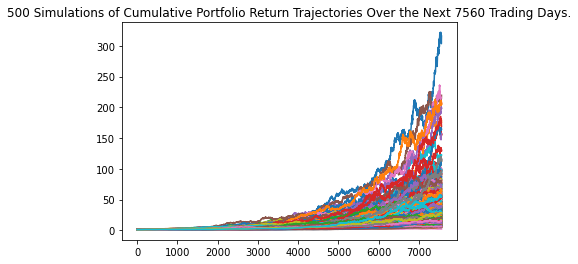

In [74]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
MC_spy_line_plot = MC_spy.plot_simulation()


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

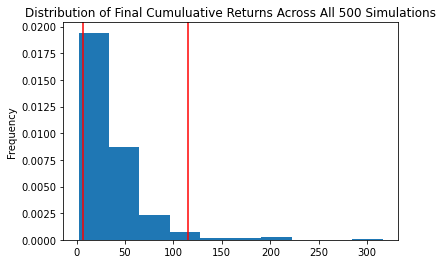

In [75]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
MC_spy_distribution_plot = MC_spy.plot_distribution()


#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [76]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
MC_spy_table = MC_spy.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
print(MC_spy_table)

count           500.000000
mean             36.215313
std              33.227868
min               2.096632
25%              16.370458
50%              27.573889
75%              44.340875
max             316.086015
95% CI Lower      6.260886
95% CI Upper    115.473364
Name: 7560, dtype: float64


### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [77]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"the current value of the member's stock and bond portion of their portfolio is ${total_stocks_bonds:,.2f}")


the current value of the member's stock and bond portion of their portfolio is $71,631.00


In [80]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = round(MC_spy_table[8]*total_stocks_bonds,2)
ci_upper_thirty_cumulative_return = round(MC_spy_table[9]*total_stocks_bonds,2)

# Print the result of your calculations
print(f"There is a 95% chance that a portfolio valued at ${total_stocks_bonds:,.2f},with a weight distribution of 60% SPY and 40% AGG,\n"
      f"over the next 30 years will end within in the range of"
      f" ${ci_lower_thirty_cumulative_return:,.2f} and ${ci_upper_thirty_cumulative_return:,.2f}.")


There is a 95% chance that a portfolio valued at $71,631.00,with a weight distribution of 60% SPY and 40% AGG,
over the next 30 years will end within in the range of $448,473.50 and $8,271,472.56.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [82]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
MC_ten_year = MCSimulation(
    portfolio_data = prices_df,
    weights = [.20,.80],
    num_simulation=500,
    num_trading_days=252*10
)

# Review the simulation input data
MC_ten_year.portfolio_data.head()


AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2018-07-23 00:00:00-04:00  106.17  106.1850  105.8850  105.910  1603571.0   
2018-07-24 00:00:00-04:00  105.92  106.0700  105.9001  106.040  1924876.0   
2018-07-25 00:00:00-04:00  106.12  106.1700  105.9500  106.050  2028743.0   
2018-07-26 00:00:00-04:00  106.10  106.1500  105.9500  106.000  1721051.0   
2018-07-27 00:00:00-04:00  106.13  106.1599  106.0400  106.075  1261312.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2018-07-23 00:00:00-04:00          NaN  279.45  280.43  279.06  280.24   
2018-07-24 00:00:00-04:00     0.001227  281.79  282.56  280.63  281.57   
2018-07-25 00:00:00-04:00     0.000094  281.33  284.37  281.28  284.13   
2018-07-26 00:00:00-04:00    -0.000471  283.21  284.11  283.09  283.29   
2018-07-27 00:00:00-04:00     0.000708  283.71  283.82  280.38  281.46   

                                                  
                             volume daily_return  
time                                              
2018-07-23 00:00:00-04:00  34039725          NaN  
2018-07-24 00:00:00-04:00  46684350     0.004746  
2018-07-25 00:00:00-04:00  50868250     0.009092  
2018-07-26 00:00:00-04:00  38319472    -0.002956  
2018-07-27 00:00:00-04:00  57211361    -0.006460

In [83]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003614,0.998247,0.995876,1.004187,0.994186,1.017463,0.989437,0.995074,1.010854,1.001067,...,1.000075,1.001773,0.991908,0.993802,0.997582,0.996590,0.985535,0.985937,0.981317,0.988982
2,1.008928,0.988456,0.974464,0.999673,0.999829,1.005872,0.973152,0.997678,1.008799,0.996620,...,1.016241,0.997861,0.980476,1.000659,0.991603,0.998481,0.965769,0.992254,0.986566,0.992535
3,1.004930,0.983867,0.988855,1.010556,0.985491,1.003868,0.981134,0.993016,1.006549,0.993260,...,1.017793,1.000196,0.955437,1.013211,0.978539,1.000212,0.948482,0.999282,0.972668,0.988170
4,1.003235,0.979933,0.992985,1.008522,0.996154,1.041519,0.995730,0.998077,0.989201,0.997139,...,1.015714,1.010441,0.963164,1.009101,0.965754,0.980798,0.948741,0.975800,0.954125,0.974845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,6.083712,3.717242,6.006804,6.245075,3.328188,4.012520,5.457817,5.399138,8.673427,4.911790,...,3.456972,9.637440,14.720160,2.288347,2.294826,2.305359,1.476096,8.038507,3.647687,5.572022
2517,6.029717,3.667848,6.024288,6.279347,3.345840,3.999860,5.456199,5.467457,8.792985,4.898315,...,3.476625,9.684065,14.832124,2.291453,2.341357,2.309266,1.472393,7.997430,3.562525,5.575149
2518,6.110798,3.720494,6.073129,6.243959,3.302462,3.985819,5.538438,5.416961,8.697657,4.934114,...,3.507437,9.590324,14.877266,2.271751,2.295105,2.342945,1.477084,8.098766,3.567555,5.523696
2519,6.164681,3.714633,5.977942,6.284212,3.230680,4.016465,5.546395,5.386820,8.572427,5.016709,...,3.558417,9.678600,14.771609,2.304299,2.294577,2.370308,1.457936,8.264436,3.619064,5.528141


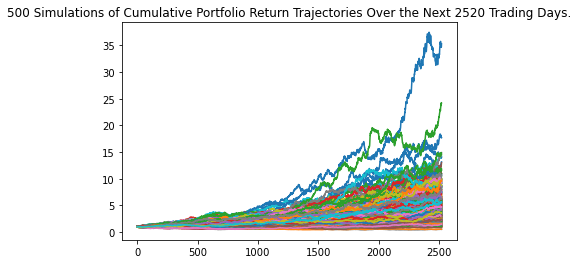

In [87]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
MC_ten_year_line_plot = MC_ten_year.plot_simulation()


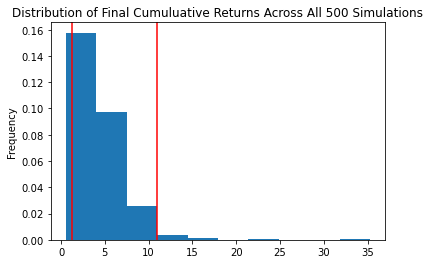

In [88]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
MC_ten_year_dist_plot = MC_ten_year.plot_distribution()


In [89]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
MC_ten_year_table = MC_ten_year.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics
print(MC_ten_year_table)

count           500.000000
mean              4.459633
std               3.003784
min               0.538165
25%               2.629028
50%               3.663617
75%               5.568985
max              35.289462
95% CI Lower      1.219814
95% CI Upper     10.932343
Name: 2520, dtype: float64


### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [ ]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE


In [ ]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = # YOUR CODE HERE
ci_upper_ten_cumulative_return = # YOUR CODE HERE

# Print the result of your calculations
# YOUR CODE HERE


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?